In [259]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import math

plt.rcParams["figure.figsize"] = (15,10)

# Setup

We will be faking a background of a Poisson distribution of mean 100.

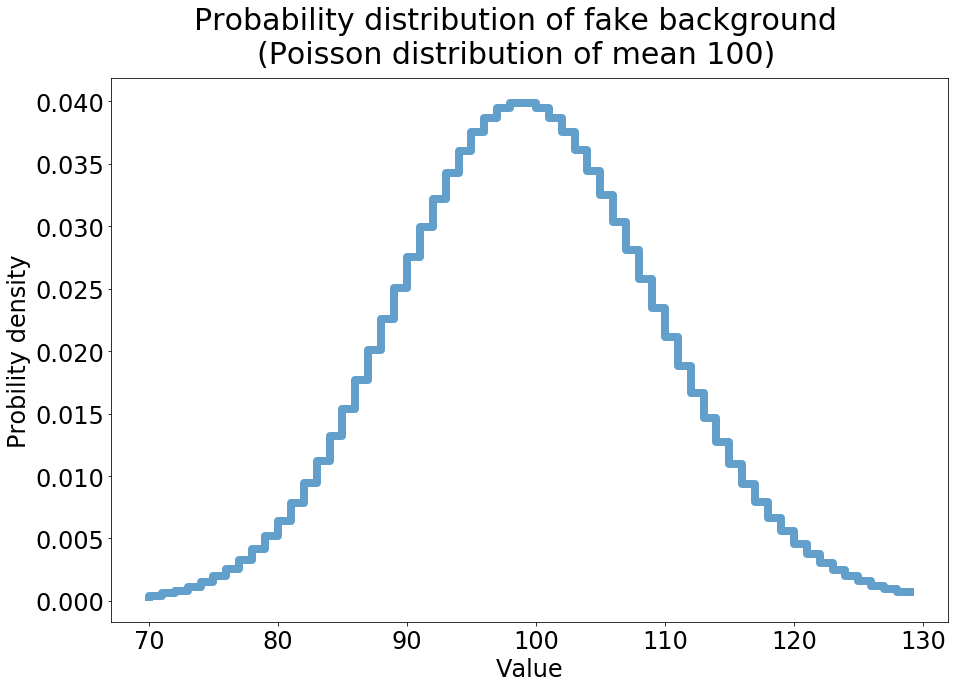

In [260]:
plt.suptitle('Probability distribution of fake background\n(Poisson distribution of mean 100)', fontsize=30)
plt.xlabel('Value', fontsize = 24)
plt.ylabel('Probility density', fontsize = 24)
plt.tick_params(labelsize = 24)
x = np.arange(70,130)
plt.step(x, stats.poisson.pmf(x, 100, loc=0), linewidth = 8,alpha = 0.7)
plt.show()

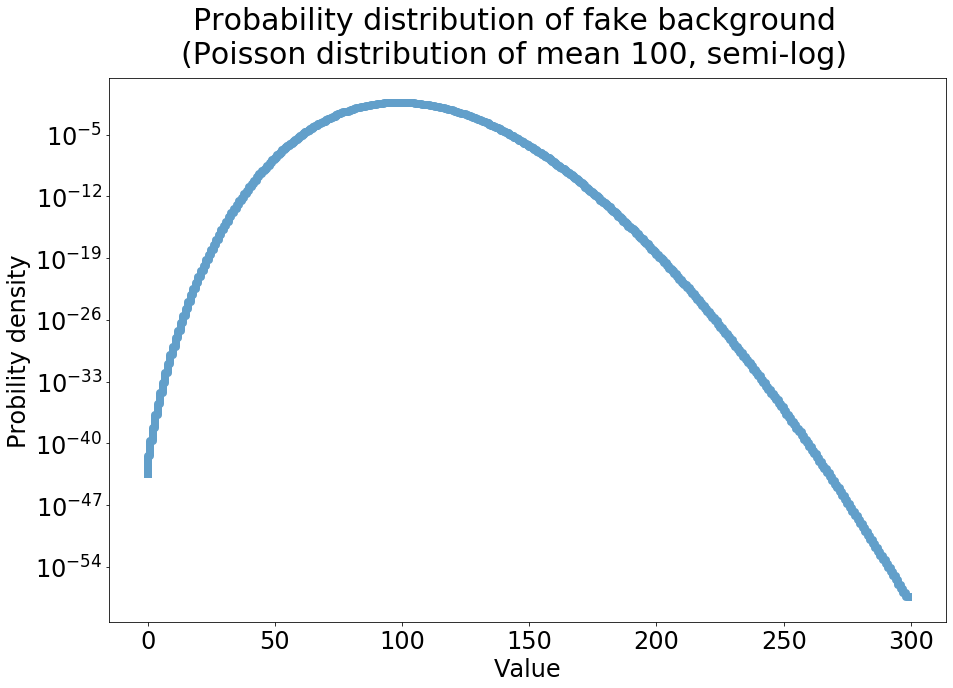

In [261]:
plt.suptitle('Probability distribution of fake background\n(Poisson distribution of mean 100, semi-log)', fontsize=30)
plt.xlabel('Value', fontsize = 24)
plt.ylabel('Probility density', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.yscale('log')
x = np.arange(0,300)
plt.step(x, stats.poisson.pmf(x, 100, loc=0), linewidth = 8,alpha = 0.7)
plt.show()

# Problem 1

We will be finding the 5-sigma threashold for our generated background.

In [262]:
sigma5 = stats.norm.sf(5, loc=0, scale=1)
sigma5

2.866515718791933e-07

In [263]:
thu = stats.poisson.isf(sigma5, 100, loc=0)
thu

154.0

In [264]:
thd = stats.poisson.ppf(sigma5, 100, loc=0)
thd

54.0

Our $5\sigma$ sensitivty threasholds for the background are **54** (lower) and **154** (upper).

# Problem 2

## a)

In [265]:
sigma1 = stats.norm.sf(1, loc=0, scale=1)
sigma1_pois = stats.poisson.isf(sigma1, 100, loc=0)
sigma1_pois

110.0

1-sigma is about 10 for our case, and we want the inserted data to be 8 to 30 sigma.

We'll just get a random value from between these as the signal.

178 is a good value.

In [266]:
signal = 178

We'll attempt to insert the signal into the background 100,000 times.
<br>All 100,100 background values will be generated using a Poisson distribution with the same parameters as our background.

In [284]:
insertions = stats.poisson.rvs(100, loc=0, size=100000) + signal

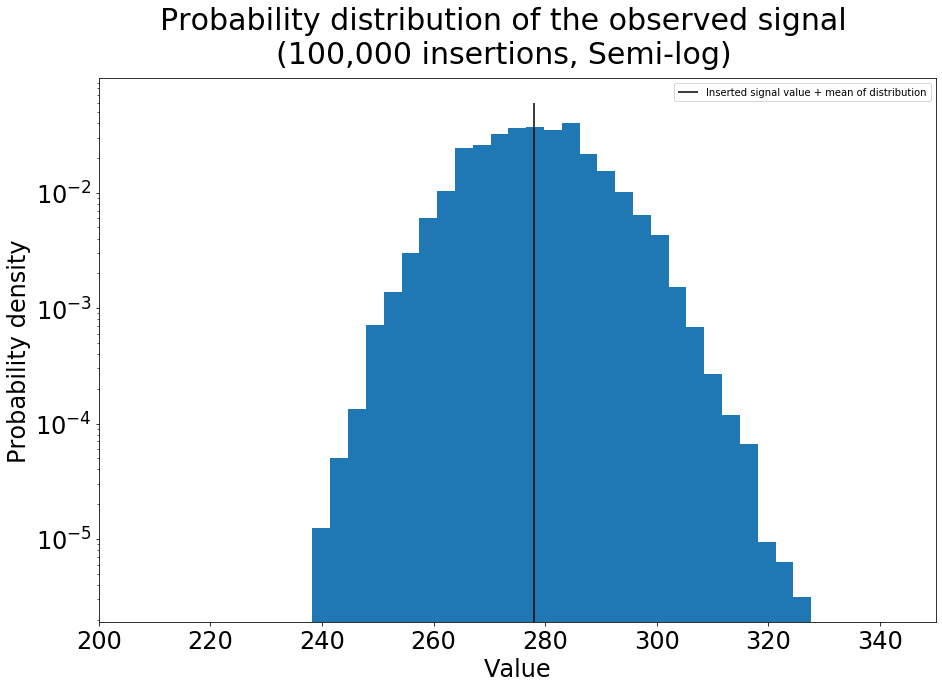

In [285]:
plt.suptitle('Probability distribution of the observed signal\n(100,000 insertions, Semi-log)', fontsize=30)
plt.xlabel('Value', fontsize = 24)
plt.ylabel('Probability density', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.yscale('log')
plt.xlim([200,350])
insertion_hist = plt.hist(insertions,  bins = np.linspace(200,350,48), density = True)
plt.vlines(signal + 100, ymin = 0, ymax = 0.06, label = 'Inserted signal value + mean of distribution')
plt.legend()
plt.show()

From the histogram, it looks like some kind of gaussian distribution with a high count near the value of (mean + signal) and low count near the tails of each end.

The histogram shows us the probability of observing a signal if the true signal is always of a value of 178, injected into 100,000 random background values characterized by a Poission distribution background of mean 100.

## b)

In [286]:
lower = (insertions < signal + 100).sum()
lower

48806

In [287]:
higher = (insertions > signal + 100).sum()
higher

47234

In [288]:
equals = (insertions == signal + 100).sum()
equals

3960

In [289]:
(lower-higher)/100000

0.01572

The observed signal is almost not biased. 

We have 48806 observed signal smaller than the true signal and 47234 observed signals greater than the true signal.
<br>Although the observed value is more likely to be weaker than the true signal than stronger, the difference is only about 1.6%, which is rather small.
<br>The histogram itself also appears to be pretty much symmetric around the mean.

# Problem 3

## a)

We will attempt to generate 10,000,000 signals from a uniform distribution from 0 to 20 sigma.

By doing this, we are simulating our observation environment as one able to emit signals with a equal probability of any interger between 0 to 200,
<br>and our observation environment itself has a background of a Poisson distribution with mean 100.

In [273]:
sgnl = np.random.randint(0, 200, 10000000)

In [274]:
bkgd = stats.poisson.rvs(100, loc=0, size=10000000)

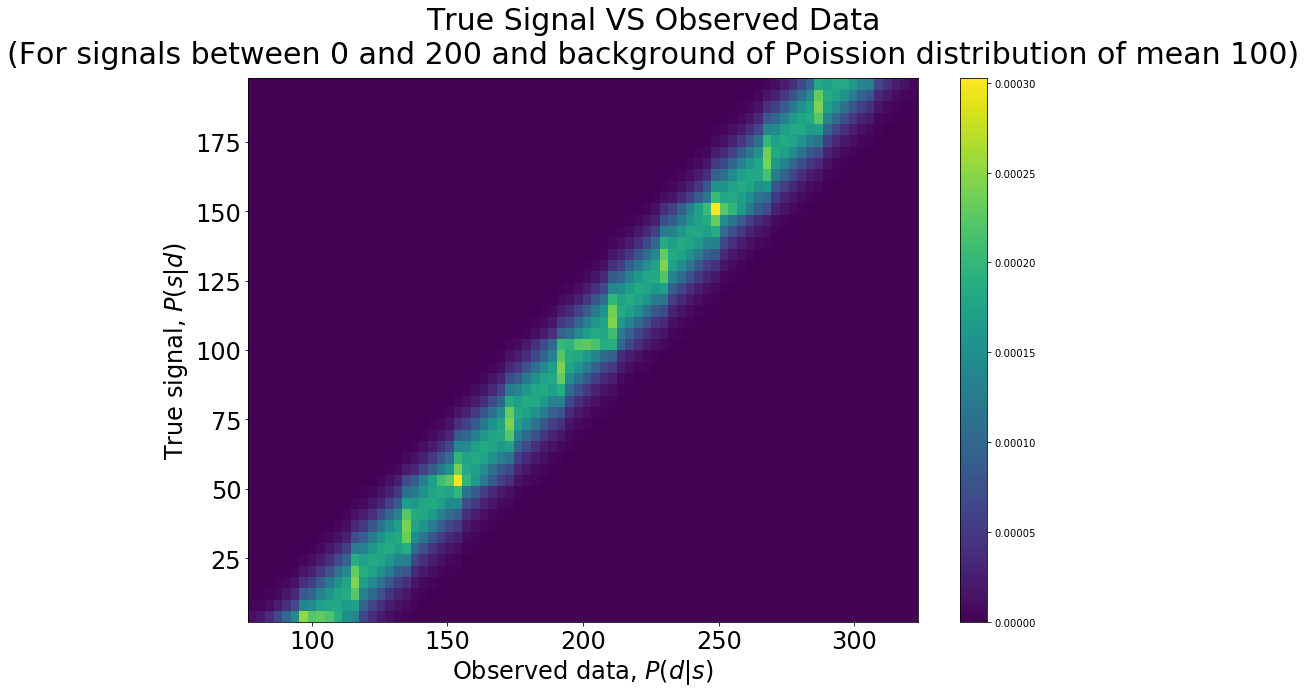

In [275]:
data = bkgd + sgnl

signaledges = np.linspace(0,200,50)
dataedges = np.linspace(75,325,80)

Psd, temp, temp2= np.histogram2d(data,sgnl, bins=[dataedges,signaledges], density=True)

plt.suptitle('True Signal VS Observed Data\n(For signals between 0 and 200 and background of Poission distribution of mean 100)', fontsize=30)
plt.tick_params(labelsize = 24)
datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
plt.colorbar()
plt.show()

## b)

Due to the data formatting of the histogram, it's easier to locate the injected signal value from the bins that were used by the histogram.

In [276]:
print(signalcenters)
print(signalcenters[43])

[  2.04081633   6.12244898  10.20408163  14.28571429  18.36734694
  22.44897959  26.53061224  30.6122449   34.69387755  38.7755102
  42.85714286  46.93877551  51.02040816  55.10204082  59.18367347
  63.26530612  67.34693878  71.42857143  75.51020408  79.59183673
  83.67346939  87.75510204  91.83673469  95.91836735 100.
 104.08163265 108.16326531 112.24489796 116.32653061 120.40816327
 124.48979592 128.57142857 132.65306122 136.73469388 140.81632653
 144.89795918 148.97959184 153.06122449 157.14285714 161.2244898
 165.30612245 169.3877551  173.46938776 177.55102041 181.63265306
 185.71428571 189.79591837 193.87755102 197.95918367]
177.55102040816325


We inserted a true signal of 178 in problem 2, which is closest to the 44th entry of the bins for true signals.

In [277]:
sum_tru = np.sum(Psd[:,43])
stair_tru = np.append([0],Psd[:,43])

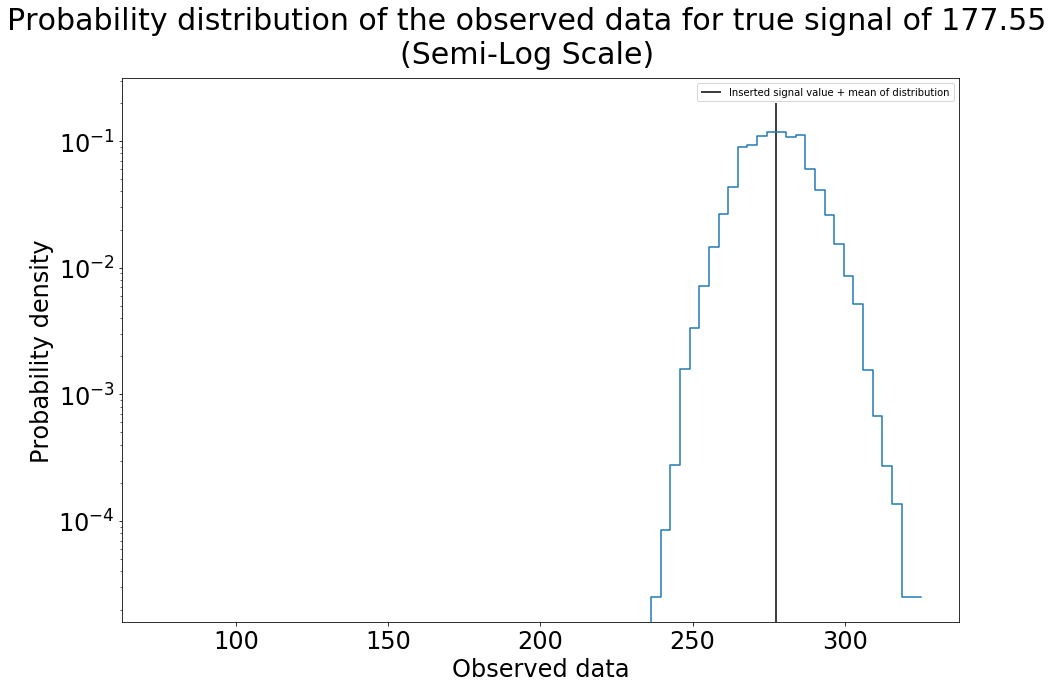

In [278]:
plt.suptitle('Probability distribution of the observed data for true signal of 177.55\n(Semi-Log Scale)', fontsize=30)
plt.xlabel('Observed data', fontsize = 24)
plt.ylabel('Probability density', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.yscale('log')
plt.vlines(signalcenters[43]+ 100, ymin = 0, ymax = 0.2, label = 'Inserted signal value + mean of distribution')
plt.step(dataedges, stair_tru/sum_tru)
plt.legend()
plt.show()

The plot looks very similar to what we did in problem 2. We'll plot them together to better examine them.

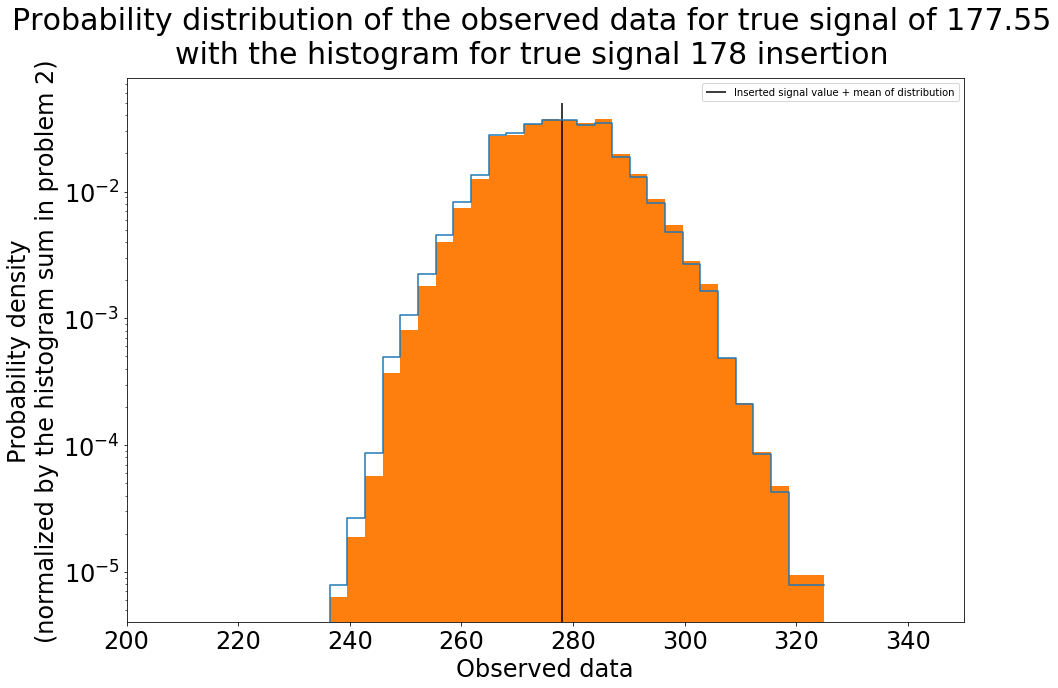

In [290]:
plt.suptitle('Probability distribution of the observed data for true signal of 177.55\nwith the histogram for true signal 178 insertion', fontsize=30)
plt.xlabel('Observed data', fontsize = 24)
plt.ylabel('Probability density\n(normalized by the histogram sum in problem 2)', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.yscale('log')
plt.step(dataedges, stair_tru/sum_tru * np.sum(insertion_hist[0]))
plt.hist(insertions,  bins = dataedges, density = True)
plt.vlines(signal + 100, ymin = 0, ymax = 0.05, label = 'Inserted signal value + mean of distribution')
plt.xlim([200,350])
plt.legend()
plt.show()

**The two diagrams match up well. We've got the same distribution.**

In [291]:
signalcenters[43] + 100

277.55102040816325

In [292]:
datacenters[63]

275.9493670886076

In [293]:
datacenters[64]

279.11392405063293

It seems that the first 64 centers the observed data bins are below the (true signal + background mean), and the rest is above.

In [294]:
below = np.sum(Psd[0:64,43])/np.sum(Psd[:,43])
below

0.5055788739951758

In [295]:
above = np.sum(Psd[64:,43])/np.sum(Psd[:,43])
above

0.49442112600482396

In [296]:
below - above

0.011157747990351796

We have 50.6% of the data less than the (mean + signal), and 49.4% of the data greater than the (mean + signal).

Again, we have only 1.1% of the data less than the (mean + signal) more then the ones greater than (mean + signal).
<br>This matches closely with what we did back in problem 2.

## c)

In [297]:
print(datacenters)
datacenters[27]

[ 76.58227848  79.74683544  82.91139241  86.07594937  89.24050633
  92.40506329  95.56962025  98.73417722 101.89873418 105.06329114
 108.2278481  111.39240506 114.55696203 117.72151899 120.88607595
 124.05063291 127.21518987 130.37974684 133.5443038  136.70886076
 139.87341772 143.03797468 146.20253165 149.36708861 152.53164557
 155.69620253 158.86075949 162.02531646 165.18987342 168.35443038
 171.51898734 174.6835443  177.84810127 181.01265823 184.17721519
 187.34177215 190.50632911 193.67088608 196.83544304 200.
 203.16455696 206.32911392 209.49367089 212.65822785 215.82278481
 218.98734177 222.15189873 225.3164557  228.48101266 231.64556962
 234.81012658 237.97468354 241.13924051 244.30379747 247.46835443
 250.63291139 253.79746835 256.96202532 260.12658228 263.29113924
 266.4556962  269.62025316 272.78481013 275.94936709 279.11392405
 282.27848101 285.44303797 288.60759494 291.7721519  294.93670886
 298.10126582 301.26582278 304.43037975 307.59493671 310.75949367
 313.92405063 317.

162.0253164556962

We know our background has a sigma-5 value of 154. Thus, the 28th entry of the observed data bins, 162.03, would be a good choice for an observed data.

In [298]:
sum_obs = np.sum(Psd[27,:])
stair_obs = np.append([0],Psd[27,:])

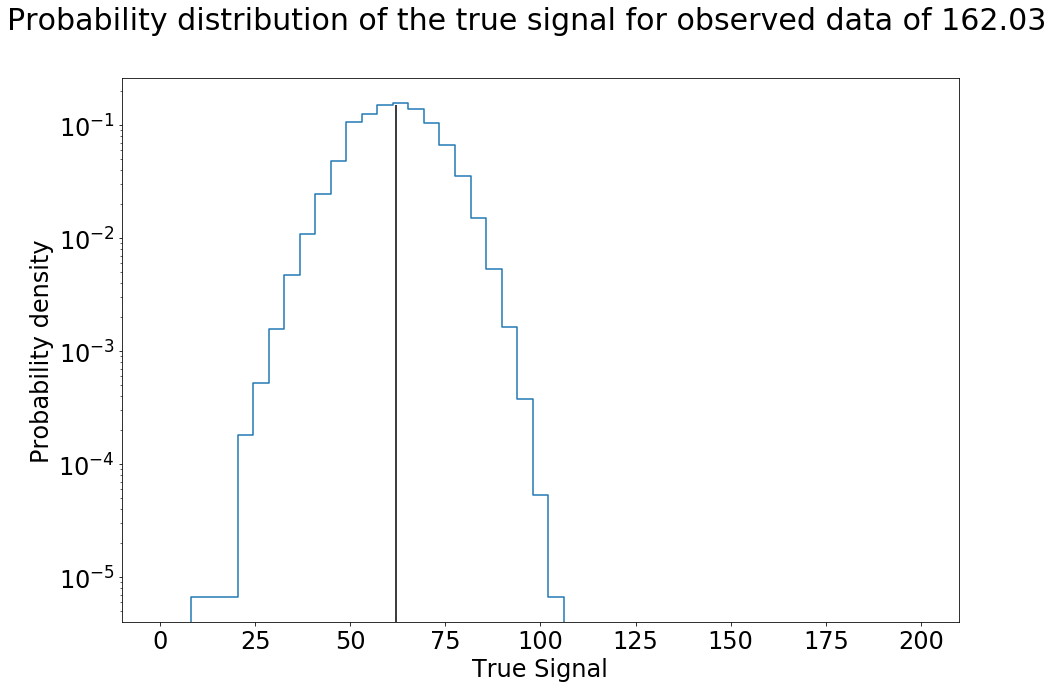

In [299]:
plt.suptitle('Probability distribution of the true signal for observed data of 162.03', fontsize=30)
plt.xlabel('True Signal', fontsize = 24)
plt.ylabel('Probability density', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.yscale('log')
plt.step(signaledges, stair_obs/sum_obs)
plt.vlines(datacenters[27] - 100, ymin = 0, ymax = 0.15, label = 'Observed data value - mean of distribution')
plt.show()

The meaning of this histogram is that:

Given a data we observed (that's caused by injecting signals into a background of a Poisson distribution of mean 100),
<br>What's the probability (Y) of the true signal being X?

# d)

In [300]:
print(signalcenters)
print(signalcenters[15])

[  2.04081633   6.12244898  10.20408163  14.28571429  18.36734694
  22.44897959  26.53061224  30.6122449   34.69387755  38.7755102
  42.85714286  46.93877551  51.02040816  55.10204082  59.18367347
  63.26530612  67.34693878  71.42857143  75.51020408  79.59183673
  83.67346939  87.75510204  91.83673469  95.91836735 100.
 104.08163265 108.16326531 112.24489796 116.32653061 120.40816327
 124.48979592 128.57142857 132.65306122 136.73469388 140.81632653
 144.89795918 148.97959184 153.06122449 157.14285714 161.2244898
 165.30612245 169.3877551  173.46938776 177.55102041 181.63265306
 185.71428571 189.79591837 193.87755102 197.95918367]
63.265306122448976


The mean of our true signal is closest to the 16th entry of the center of the true signal bins.
We will use this value as a mean and find our upper and lower 1-sigmas.

A 1-sigma corresponds to enclosing 34% of the values from the mean.

In [308]:
total = 0
i = 15
while i < len(signalcenters):
    if total/sum_obs > 0.34:
        break
    total += Psd[27,i]
    i = i + 1
tru_threashold_hi = signaledges[i]
tru_threashold_hi 

73.46938775510205

In [310]:
total = 0
i = 15
while i > 0:
    if total/sum_obs > 0.34:
        break
    total += Psd[27,i]
    i = i - 1
tru_threashold_lo = signaledges[i + 1]
tru_threashold_lo 

53.06122448979592

In [304]:
mean = signalcenters[15]
mean

63.265306122448976

In [311]:
tru_threashold_lo - mean

-10.204081632653057

In [309]:
tru_threashold_hi  - mean

10.204081632653072

Our 1-sigma upper threashold is 73.47, while our lower threashold is 53.06.

### Our $1-\sigma$ uncertainty of true signal strength 63.27 corresponds to $63.27\pm10.2$.

# e)

The answer to part D is pretty much symmetric, both on the plot and on the 1-sigma uncertainties.

This is to be expected, because our background is a Poisson distribution of mean 100 which is near symmetrical and has a shape like a Gaussian distribution.
<br>Thus, when this distribution is stretched linearly in the vertical "True data" axis (since our true data axis is uniform into a 2D plot, and we cut the plot in the vertical direction, It's like flipping the X and Y axes, which leads us to seeing the same shape but mirrored by the y=-x axis. 

In the original Poisson distribution, there's a very little higher chance of getting a value smaller than the mean than larger than the mean, and these values exist to the top=left of the brightest line on the 2D histogram (the mean of background + true signal), which translates to a very little higher chance of getting a value greater than the mean than smaller than the mean.

However, that asymmetrical is about 1% (only 1% difference in chances), so it does not affect out 1$\sigma$ value significantly and what we see is still a symmetrical $\pm$ sign.